<a href="https://colab.research.google.com/github/chatlynz/FINC612-Assignment-01-Group-21/blob/main/P3_Mathematics%20and%20Statistics%20/Part3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
Q1 — Selected 10 tickers: ['BMW.DE', 'ADS.DE', 'MRK.DE', 'DHL.DE', 'ALV.DE', 'SRT3.DE', 'HEI.DE', 'DB1.DE', 'VOW3.DE', '1COV.DE']
== Q1: 10 Selected Stocks Monthly Returns ==


,BMW.DE,ADS.DE,MRK.DE,DHL.DE,ALV.DE,SRT3.DE,HEI.DE,DB1.DE,VOW3.DE,1COV.DE
Date,,,,,,,,,,
2020-02-29,-0.084085,-0.123338,-0.059103,-0.141093,-0.097522,-0.017094,-0.121410,-0.034002,-0.084986,-0.095937
2020-03-31,-0.200492,-0.178208,-0.141495,-0.086468,-0.194661,0.073430,-0.273960,-0.120028,-0.280926,-0.191940
2020-04-30,0.147193,0.016027,0.133305,0.095863,0.076492,0.155715,0.109747,0.134000,0.200112,0.100825
2020-05-31,0.027747,0.133843,-0.015710,0.030571,0.025080,0.298287,0.028815,0.063572,0.033380,0.085072
2020-06-30,0.080228,-0.015177,0.001454,0.163331,0.116325,-0.121314,0.078001,0.088912,0.018415,0.016822
...,...,...,...,...,...,...,...,...,...,...
2025-03-31,-0.121812,-0.119821,-0.069460,0.047493,0.066001,-0.110355,0.085055,0.083201,-0.101249,0.012745
2025-04-30,0.008415,-0.069220,-0.019104,-0.049899,0.034081,0.063202,0.105998,0.041896,0.020094,-0.000680
2025-05-31,0.107870,0.098280,-0.052502,0.103034,-0.000983,-0.070894,0.007149,0.014503,0.065020,0.022805


== Q1: DAX and EWP Monthly Returns ==


,DAX,EWP
Date,,
2020-02-29,-0.084087,-0.085857
2020-03-31,-0.164378,-0.159475
2020-04-30,0.093178,0.116928
2020-05-31,0.066768,0.071066
2020-06-30,0.062492,0.042700
...,...,...
2025-03-31,-0.017202,-0.022820
2025-04-30,0.015047,0.013478
2025-05-31,0.066698,0.029428


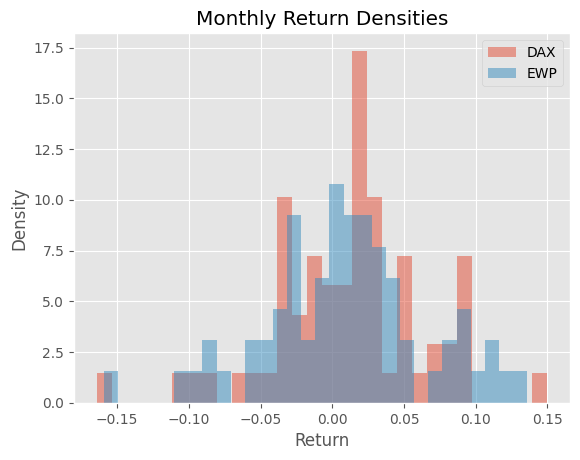

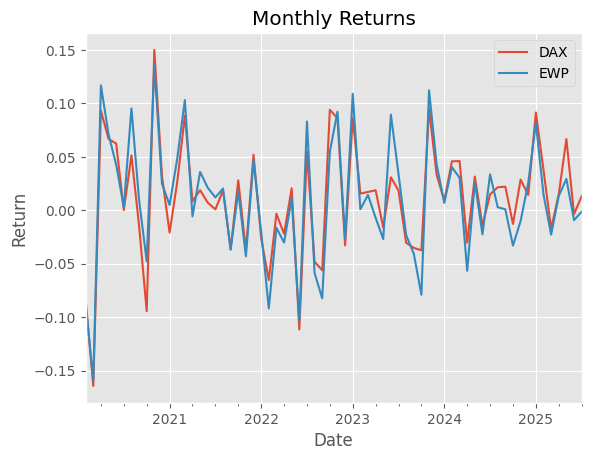

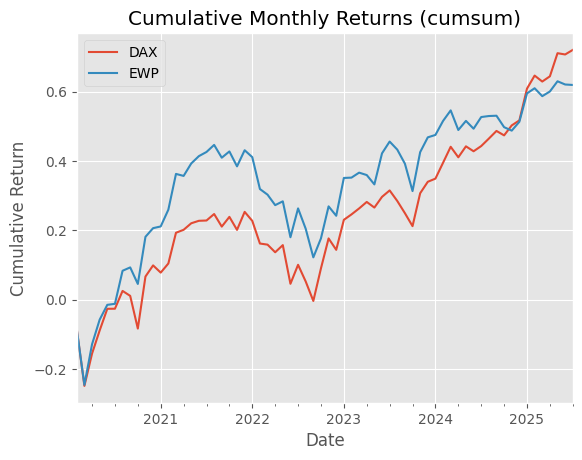

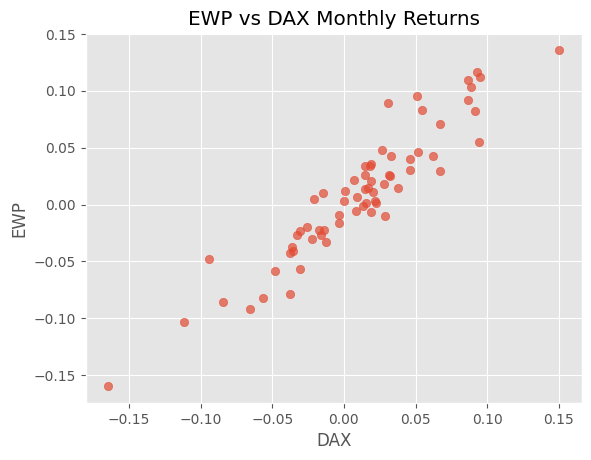

First four moments (sample variance, unbiased skew, excess kurtosis):


,mean,var,skew,kurtosis
DAX,0.010917,0.002863,-0.406427,1.340773
EWP,0.009386,0.003275,-0.159555,0.451060


Pearson correlation coefficient (DAX vs EWP): 0.9359


,DAX,EWP
hist_VaR_95,-0.084087,-0.085857
hist_ES_95,-0.113589,-0.110192
gauss_VaR_95,-0.077092,-0.084750
gauss_ES_95,-0.099450,-0.108664


In [13]:
import os, sqlite3, math
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy import stats

from google.colab import drive
drive.mount('/content/drive')

plt.style.use("ggplot")

GROUP_NUMBER =21
BASE_DIR = '/content/drive/MyDrive/FINC612/Data'
DB_PATH = f'{BASE_DIR}/DAX.db'
OUT_DIR = BASE_DIR

# Load Data
con = sqlite3.connect(DB_PATH)
df = pd.read_sql("SELECT * FROM DAX;", con, parse_dates=['Date'])
con.close()

df = df.set_index('Date').sort_index()

TICKERS = [c for c in df.columns if c != 'DAX']
len(df), len(TICKERS)

#Select 10 random tickers
np.random.seed(GROUP_NUMBER)
stocks_idx = np.random.choice(len(TICKERS), size=10, replace=False)
tickers = [TICKERS[idx] for idx in stocks_idx]
tickers

#Q1: Monthly returns and EWP
print("Q1 — Selected 10 tickers:", tickers)
prices_m = df.resample('ME').last()
rets = prices_m.pct_change().dropna()

ewp = rets[tickers].mean(axis=1)
ewp.name = 'EWP'

stocks_rets = rets[tickers]
dax_ewp = pd.concat([rets['DAX'], ewp], axis=1)

print("== Q1: 10 Selected Stocks Monthly Returns ==")
display(stocks_rets)

print("== Q1: DAX and EWP Monthly Returns ==")
display(dax_ewp)

#Helper functions
def four_moments(x: pd.Series) -> pd.Series:
    x = x.dropna()
    mu = x.mean()
    var = x.var(ddof=1)
    sk = stats.skew(x, bias=False)
    kt = stats.kurtosis(x, fisher=True, bias=False)
    return pd.Series({'mean': mu, 'var': var, 'skew': sk, 'kurtosis': kt})

def hist_VaR_ES(x: pd.Series, alpha: float = 0.95) -> pd.Series:
    x = x.dropna().sort_values()
    var = x.quantile(1 - alpha, interpolation='lower')
    es = x[x <= var].mean()
    return pd.Series({f'hist_VaR_{int(alpha*100)}': var, f'hist_ES_{int(alpha*100)}': es})

def gauss_VaR_ES(x: pd.Series, alpha: float = 0.95) -> pd.Series:
    x = x.dropna()
    mu = x.mean()
    sigma = x.std(ddof=1)
    z = stats.norm.ppf(1 - alpha)
    var = mu + z * sigma
    es = mu - sigma * stats.norm.pdf(z) / (1 - alpha)
    return pd.Series({f'gauss_VaR_{int(alpha*100)}': var, f'gauss_ES_{int(alpha*100)}': es})

#Q2.1: Density
fig, ax = plt.subplots()
ax.hist(out['DAX'].dropna(), bins=30, density=True, alpha=0.5, label='DAX')
ax.hist(out['EWP'].dropna(), bins=30, density=True, alpha=0.5, label='EWP')
ax.set_title('Monthly Return Densities')
ax.set_xlabel('Return')
ax.set_ylabel('Density')
ax.legend()
plt.show()

#Q2.2: Monthly returns and cumulative monthly returns
fig, ax = plt.subplots()
out[['DAX','EWP']].plot(ax=ax)
ax.set_title('Monthly Returns')
ax.set_xlabel('Date')
ax.set_ylabel('Return')
plt.show()

fig, ax = plt.subplots()
(out[['DAX','EWP']].cumsum()).plot(ax=ax)
ax.set_title('Cumulative Monthly Returns (cumsum)')
ax.set_xlabel('Date')
ax.set_ylabel('Cumulative Return')
plt.show()

#Q2.3: Scatter plot
fig, ax = plt.subplots()
ax.scatter(out['DAX'], out['EWP'], alpha=0.7)
ax.set_title('EWP vs DAX Monthly Returns')
ax.set_xlabel('DAX')
ax.set_ylabel('EWP')
plt.show()

#Q3.1: Statistical measures
mom_dax = four_moments(out['DAX'])
mom_ewp = four_moments(out['EWP'])
corr = out['DAX'].corr(out['EWP'])

stats_table = pd.concat([mom_dax, mom_ewp], axis=1)
stats_table.columns = ['DAX', 'EWP']
print("First four moments (sample variance, unbiased skew, excess kurtosis):")
display(stats_table.T)
print(f"Pearson correlation coefficient (DAX vs EWP): {corr:.4f}")

#Q3.2: Risk measures
alpha = 0.95
risk_dax = pd.concat([hist_VaR_ES(out['DAX'], alpha), gauss_VaR_ES(out['DAX'], alpha)])
risk_ewp = pd.concat([hist_VaR_ES(out['EWP'], alpha), gauss_VaR_ES(out['EWP'], alpha)])

risk_table = pd.concat([risk_dax, risk_ewp], axis=1)
risk_table.columns = ['DAX', 'EWP']
display(risk_table)

#Part 4 export
R = rets[tickers].dropna()
R.to_csv(os.path.join(OUT_DIR, 'part4 monthly return.csv'))

bench = pd.concat([ewp, rets['DAX']], axis=1).dropna()
bench.to_csv(os.path.join(OUT_DIR, 'part4 EWP DAX.csv'))